# Analyse Statistique Dataset

---
- Justification lignes supprimées
- Top 20 mots
- description nombre de mot, nombre de token
- Nombre de classes moyenne
- Distribution des classes
---

## Import data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Barre de progression pour Jupyter
pd.set_option('display.max_colwidth', None)
from IPython.display import display, Markdown

import nltk
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import re

ModuleNotFoundError: No module named 'pandas'

In [ ]:
import os
import s3fs
os.environ["AWS_ACCESS_KEY_ID"] = 'PG1XLIX2BY3P3BRECRJQ'
os.environ["AWS_SECRET_ACCESS_KEY"] = '+Mf8EF6sSat8xMorwl1BZLZZBF+Hcj2UHJ4DRZrs'
os.environ["AWS_SESSION_TOKEN"] = 'eyJhbGciOiJIUzUxMiIsInR5cCI6IkpXVCJ9.eyJhY2Nlc3NLZXkiOiJQRzFYTElYMkJZM1AzQlJFQ1JKUSIsImFsbG93ZWQtb3JpZ2lucyI6WyIqIl0sImF1ZCI6WyJtaW5pby1kYXRhbm9kZSIsIm9ueXhpYSIsImFjY291bnQiXSwiYXV0aF90aW1lIjoxNzQzMDcwMzAzLCJhenAiOiJvbnl4aWEiLCJlbWFpbCI6InF1ZW50aW4ubWFycmV0QGVuc2FlLmZyIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImV4cCI6MTc0NDYyMzI1NCwiZmFtaWx5X25hbWUiOiJNYXJyZXQiLCJnaXZlbl9uYW1lIjoiUXVlbnRpbiIsImdyb3VwcyI6WyJVU0VSX09OWVhJQSJdLCJpYXQiOjE3NDQwMTg0NTQsImlzcyI6Imh0dHBzOi8vYXV0aC5sYWIuc3NwY2xvdWQuZnIvYXV0aC9yZWFsbXMvc3NwY2xvdWQiLCJqdGkiOiIzMTQ4NDAyMi1jMTNmLTQ5MGEtYjU4My0yMmQ2MzQ5YTk0MDkiLCJsb2NhbGUiOiJmciIsIm5hbWUiOiJRdWVudGluIE1hcnJldCIsInBvbGljeSI6InN0c29ubHkiLCJwcmVmZXJyZWRfdXNlcm5hbWUiOiJxdWVudGluMTk5OSIsInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJvZmZsaW5lX2FjY2VzcyIsInVtYV9hdXRob3JpemF0aW9uIiwiZGVmYXVsdC1yb2xlcy1zc3BjbG91ZCJdfSwicmVzb3VyY2VfYWNjZXNzIjp7ImFjY291bnQiOnsicm9sZXMiOlsibWFuYWdlLWFjY291bnQiLCJtYW5hZ2UtYWNjb3VudC1saW5rcyIsInZpZXctcHJvZmlsZSJdfX0sInJvbGVzIjpbIm9mZmxpbmVfYWNjZXNzIiwidW1hX2F1dGhvcml6YXRpb24iLCJkZWZhdWx0LXJvbGVzLXNzcGNsb3VkIl0sInNjb3BlIjoib3BlbmlkIHByb2ZpbGUgZ3JvdXBzIGVtYWlsIiwic2lkIjoiZjMwM2Q3OTYtYTM3My00MTk4LWFmZDktNWUyOTRjMWJkZTliIiwic3ViIjoiOGM1NjkxMjYtMGI2Mi00MGI0LTg4ZDAtMWFhYzgyMTJiOGE5IiwidHlwIjoiQmVhcmVyIn0.cO3MC8ZtjXLoAuYJzNi1BvPaTGQWRyMkyHT3Aakd8S6e0PvkeArmoRyzbeKOyb-amkhwkL5JNfxHsIl_t9aESw'
os.environ["AWS_DEFAULT_REGION"] = 'us-east-1'
fs = s3fs.S3FileSystem(
    client_kwargs={'endpoint_url': 'https://'+'minio.lab.sspcloud.fr'},
    key = os.environ["AWS_ACCESS_KEY_ID"], 
    secret = os.environ["AWS_SECRET_ACCESS_KEY"], 
    token = os.environ["AWS_SESSION_TOKEN"])

In [ ]:
AWS = False

In [ ]:
print(repr(os.getenv("AWS_ACCESS_KEY_ID")))
print(repr(os.getenv("AWS_SECRET_ACCESS_KEY")))

'PG1XLIX2BY3P3BRECRJQ'
'+Mf8EF6sSat8xMorwl1BZLZZBF+Hcj2UHJ4DRZrs'


In [ ]:
if AWS == True:
    if not os.path.exists("../data/df_target_V2.pkl"):
        BUCKET = "s3://quentin1999/Data_Projet_NLP"
        FILE_KEY_S3 = "df_target_V2.pkl"
        FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

        with fs.open(FILE_PATH_S3, mode="rb") as file_in:
            df = pd.read_pickle(file_in)

        print("✅ Fichier chargé avec succès, shape :", df.shape)

        df.to_pickle("../data/df_target_V2.pkl")

        print("✅ Fichier sauvegardé avec succès dans le dossier data")

raise RuntimeError("⛔ Cette cellule ne doit pas être exécutée.")

# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

BUCKET_OUT = "s3://quentin1999/Data_Projet_NLP"
FILE_KEY_OUT_S3 = "df_final"
FILE_PATH_OUT_S3 = BUCKET_OUT + "/" + FILE_KEY_OUT_S3

with fs.open(FILE_PATH_OUT_S3, 'w') as file_out:
    df.to_csv(file_out)

raise RuntimeError("⛔ Cette cellule ne doit pas être exécutée.")

BUCKET_OUT = "s3://quentin1999/Data_Projet_NLP"
FILE_KEY_OUT_S3 = "df_metadata"
FILE_PATH_OUT_S3 = BUCKET_OUT + "/" + FILE_KEY_OUT_S3

with fs.open(FILE_PATH_OUT_S3, 'w') as file_out:
    df_metadata.to_csv(file_out)

## Selection des cas cliniques


In [ ]:
os.chdir('/home/onyxia/work/projet_NLP')
os.getcwd()

'/home/onyxia/work/projet_NLP'

In [ ]:
df = pd.read_pickle('data/df_full.pkl')
print(df.shape)
print(df.columns)

(10718, 12)
Index(['pmcid', 'title', 'gender', 'case_text', 'keywords', 'major_mesh_terms',
       'mesh_terms', 'journal', 'doi', 'dict_mesh', 'codes_mesh_extraits',
       'target'],
      dtype='object')


In [ ]:
pd.set_option('display.max_colwidth', 200)  # diplay a maximum of 200 characters
df.sample(2)

,pmcid,title,gender,case_text,keywords,major_mesh_terms,mesh_terms,journal,doi,dict_mesh,codes_mesh_extraits,target
2461,PMC10203514,Ulcerative colitis complicated by primary sclerosing cholangitis and autoimmune hepatitis overlap syndrome: a case report and literature review,Male,"In 2014, a 38-year-old male patient underwent a colonoscopy because of irregular bowel habits and increased stool frequency lasting for 1 month. The colonoscopy showed that the distal ileum was fo...","[udca, autoimmune hepatitis, overlap syndrome, primary sclerosing cholangitis, ulcerative colitis]","[Cholangitis, Sclerosing / complications, Cholangitis, Sclerosing / diagnosis, Cholangitis, Sclerosing / drug therapy, Colitis, Ulcerative / complications, Colitis, Ulcerative / diagnosis, Colitis...","[Cholangitis, Sclerosing / complications, Cholangitis, Sclerosing / diagnosis, Cholangitis, Sclerosing / drug therapy, Colitis, Ulcerative / complications, Colitis, Ulcerative / diagnosis, Colitis...",Front Immunol,10.3389/fimmu.2023.1132072,"{'complications': {'Colitis, Ulcerative', 'Cholangitis, Sclerosing', 'Hepatitis, Autoimmune'}, 'diagnosis': {'Colitis, Ulcerative', 'Cholangitis, Sclerosing', 'Hepatitis, Autoimmune'}, 'drug thera...","[06, 17, 20]","[False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False]"
2979,PMC4859367,Overcoming Challenges With Statin Therapy,Male,The patient was a 63-year-old physician with a mitochondrial disorder (multiple lipomatosis) and moderately severe statin myopathy. He had severe nocturnal leg cramps that abated during drug holid...,"[persistence, adverse effects, mitochondrial function, statins, ubiquinone]","[Cardiovascular Diseases / prevention & control, Diabetes Mellitus / chemically induced, Dyslipidemias / drug therapy, Hydroxymethylglutaryl-CoA Reductase Inhibitors / adverse effects, Insulin Res...","[Cardiovascular Diseases / prevention & control, Diabetes Mellitus / chemically induced, Dyslipidemias / drug therapy, Hydroxymethylglutaryl-CoA Reductase Inhibitors / adverse effects, Insulin Res...",J Am Heart Assoc,10.1161/JAHA.115.002497,"{'prevention & control': {'Cardiovascular Diseases'}, 'chemically induced': {'Muscular Diseases', 'Diabetes Mellitus'}, 'drug therapy': {'Dyslipidemias'}, 'adverse effects': {'Hydroxymethylglutary...","[05, 10, 14, 18, 19]","[False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False]"


In [ ]:
# On convertit chaque élément en array bool explicite
target_array = np.vstack(df['target'].apply(lambda x: np.array(x, dtype=bool)))

In [ ]:
MeSH_vides = df[df['target'].apply(lambda x: not any(x))]
print("nombre cas sans code MeSH catégorie 'disease' :", MeSH_vides.shape)

df = df.drop(MeSH_vides.index)

nombre cas sans code MeSH catégorie 'disease' : (0, 12)


In [ ]:
keys = [f"C{str(i).zfill(2)}" for i in range(1, 27)]
values = target_array.sum(axis=0)
result = dict(zip(keys, values))

cas_par_classes = pd.DataFrame.from_dict(result, orient='index', columns=['nombre_cas'])
cas_par_classes

,nombre_cas
C01,2343
C02,0
C03,0
C04,2998
C05,1008
C06,1519
C07,392
C08,1567
C09,261
C10,2136


In [ ]:
print("nombre de classes avec 100+ cas :", (cas_par_classes > 100).sum().iloc[0])
print("nombre de classes avec 1000+ cas :", (cas_par_classes > 1000).sum().iloc[0])

nombre de classes avec 100+ cas : 20
nombre de classes avec 1000+ cas : 13


In [ ]:
print("Nombre de label au total: ", cas_par_classes.sum().iloc[0])
print("Nombre de catégorie par cas clinique en moyenne: ", round((cas_par_classes.sum().iloc[0] / df.shape[0]),2))
print("Nombre de cas par catégorie moyenne: ", round((cas_par_classes.sum().iloc[0] / 23),2))


Nombre de label au total:  27367
Nombre de catégorie par cas clinique en moyenne:  2.72
Nombre de cas par catégorie moyenne:  1189.87


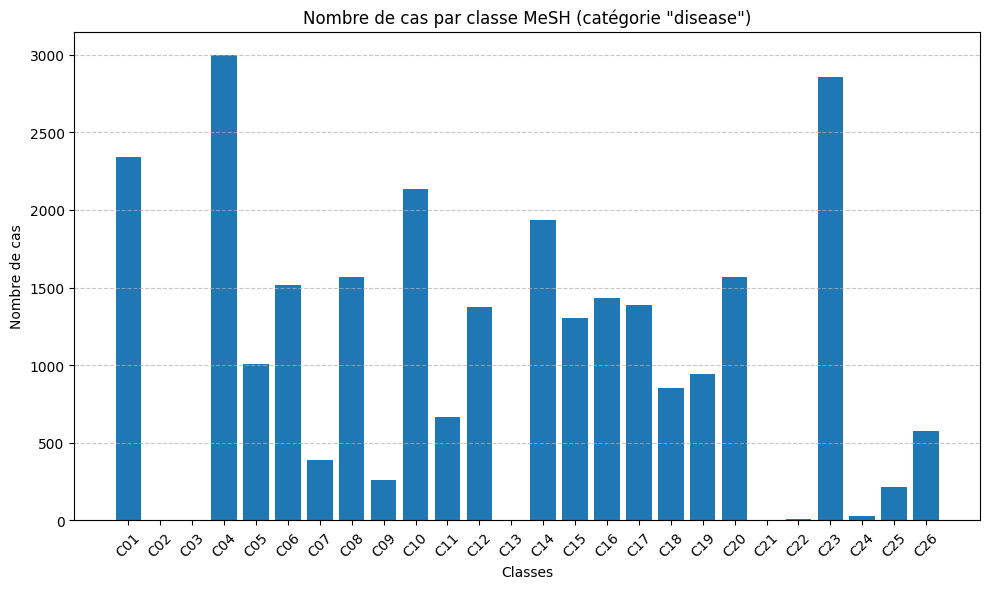

In [ ]:
# Tracer un barplot
plt.figure(figsize=(10, 6))
plt.bar(cas_par_classes.index, cas_par_classes['nombre_cas'])
plt.xlabel('Classes')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas par classe MeSH (catégorie "disease")')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Matrice de corrélation entre les classes

In [ ]:
import numpy as np
import pandas as pd

# 1. Ton array de base
arr_int = target_array.astype(int)

# 2. Générer TOUS les noms d'origine
full_category_names = [f"C{str(i+1).zfill(2)}" for i in range(arr_int.shape[1])]

# 3. Détecter colonnes non constantes
non_constant_columns = arr_int.std(axis=0) != 0

# 4. Réduire arr_int en gardant trace
arr_int = arr_int[:, non_constant_columns]

# 5. Garder uniquement les catégories non constantes
category_names = [name for name, keep in zip(full_category_names, non_constant_columns) if keep]

# 6. Calcul de la corrélation
correlation_matrix = np.corrcoef(arr_int, rowvar=False)

# 7. Masquer le triangle inférieur
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix = np.where(mask, np.nan, correlation_matrix)

# 8. Créer un DataFrame avec les noms corrects
correlation_df = pd.DataFrame(correlation_matrix, index=category_names, columns=category_names)

# 9. Fonction de stylisation
def style_corr(val):
    if pd.isna(val):
        return ""
    style = ""
    if abs(val) > 0.10:
        style += "font-weight: bold;"
    return style

# 10. Appliquer le style
styled_corr = (
    correlation_df.style
    .format(precision=2, na_rep="")  # 2 chiffres
    .background_gradient(cmap='RdYlGn', vmin=-1, vmax=1)  # couleurs
    .applymap(style_corr)  # gras si |corr| > 0.10
    .set_properties(**{'font-size': '10pt'})  # taille police
    .set_caption("Matrice de corrélation (triangle supérieur) entre classes MeSH C01 à C26")
)

# 11. Afficher
styled_corr

/tmp/ipykernel_5185/976907673.py:43: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(style_corr)  # gras si |corr| > 0.10


,C01,C04,C05,C06,C07,C08,C09,C10,C11,C12,C14,C15,C16,C17,C18,C19,C20,C22,C23,C24,C25,C26
C01,,-0.22,-0.06,-0.02,-0.03,0.26,0.00,-0.07,-0.03,0.02,-0.11,-0.03,-0.16,-0.02,-0.10,-0.10,0.04,0.05,-0.04,-0.01,-0.02,-0.09
C04,,,-0.01,0.13,0.05,-0.00,0.03,-0.07,-0.07,0.06,-0.15,0.15,-0.14,0.02,-0.10,0.16,0.06,-0.02,-0.15,-0.02,-0.07,-0.12
C05,,,,-0.09,0.11,-0.06,0.03,0.05,0.01,-0.05,-0.07,-0.05,0.11,0.07,0.05,0.00,0.00,-0.01,-0.05,-0.01,-0.03,0.05
C06,,,,,-0.04,-0.09,-0.01,-0.16,-0.09,-0.05,-0.11,-0.03,-0.04,-0.07,0.01,0.02,-0.05,0.03,0.06,-0.01,-0.00,-0.04
C07,,,,,,-0.04,0.18,-0.03,0.09,-0.04,-0.02,-0.02,0.03,0.09,-0.04,-0.05,0.02,-0.01,-0.03,-0.00,0.05,-0.04
C08,,,,,,,0.14,-0.10,-0.07,-0.08,-0.03,-0.02,-0.07,-0.06,-0.07,-0.05,-0.00,-0.01,-0.03,0.06,-0.02,-0.05
C09,,,,,,,,0.07,0.01,-0.03,-0.01,-0.02,0.01,-0.02,-0.02,-0.02,-0.03,-0.00,0.05,0.00,-0.02,-0.01
C10,,,,,,,,,0.11,-0.10,0.02,-0.10,0.08,-0.08,0.05,0.02,0.00,-0.00,0.12,-0.01,-0.01,0.07
C11,,,,,,,,,,-0.07,-0.02,-0.05,0.08,0.05,-0.01,-0.03,0.02,0.02,-0.00,0.00,-0.03,-0.01
C12,,,,,,,,,,,-0.08,-0.03,-0.01,-0.05,0.01,0.12,0.05,-0.01,0.00,-0.02,-0.02,-0.05


In [ ]:
# Flatten the upper triangle of correlation_df
corr_values = correlation_df.values.flatten()

# Drop NaN values (masked lower triangle)
corr_values = corr_values[~np.isnan(corr_values)]

# Now define the correct ranges
count_no_corr = np.sum((corr_values >= -0.10) & (corr_values < 0.10))
count_low_corr = np.sum(((corr_values >= -0.20) & (corr_values < -0.10)) | ((corr_values >= 0.10) & (corr_values < 0.20)))
count_moderate_corr = np.sum(((corr_values >= -0.30) & (corr_values < -0.20)) | ((corr_values >= 0.20) & (corr_values < 0.30)))
count_strong_corr = np.sum((corr_values <= -0.30) | (corr_values >= 0.30))

# Display
print(f"Nombre de corrélations entre [-0.10, 0.10) (quasi nulles) : {count_no_corr}")
print(f"Nombre de corrélations entre [-0.20, -0.10) ou [0.10, 0.20) (faibles) : {count_low_corr}")
print(f"Nombre de corrélations entre [-0.30, -0.20) ou [0.20, 0.30) (modérées) : {count_moderate_corr}")
print(f"Nombre de corrélations ≤ -0.30 ou ≥ 0.30 (fortes) : {count_strong_corr}")

Nombre de corrélations entre [-0.10, 0.10) (quasi nulles) : 204
Nombre de corrélations entre [-0.20, -0.10) ou [0.10, 0.20) (faibles) : 22
Nombre de corrélations entre [-0.30, -0.20) ou [0.20, 0.30) (modérées) : 4
Nombre de corrélations ≤ -0.30 ou ≥ 0.30 (fortes) : 1


In [ ]:
print(correlation_df.shape)

(22, 22)


## Analyse case_text

In [ ]:
# Statistiques nombre de caractères
df['case_text'].str.len().describe().astype(int)

count    10051
mean      3502
std       2399
min        145
25%       2004
50%       3012
75%       4343
max      60512
Name: case_text, dtype: int64

In [ ]:
# Statistiques nombre de mots
df['case_text'].apply(lambda x: len(str(x).split())).describe().astype(int)

count    10051
mean       524
std        360
min         25
25%        300
50%        452
75%        648
max       8797
Name: case_text, dtype: int64

### Nuage de mots ordinaires

In [ ]:

from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text_brut = " ".join(df['case_text'].astype(str))
STOPWORDS = set(stopwords.words('english'))

# Nettoyer et découper en mots
words = re.findall(r'\b\w+\b', text_brut.lower())
words = [word for word in words if word not in STOPWORDS and len(word) > 2]

# Compte les occurrences des mots
term_counts = Counter(words)

# Prend les 20 mots les plus fréquents
most_common_terms = term_counts.most_common(20)

# Affiche proprement en texte
print("Top 20 des mots les plus fréquents :")
for term, count in most_common_terms:
    print(f"{term}: {count}")

Top 20 des mots les plus fréquents :
patient: 42208
showed: 21150
figure: 19926
normal: 17939
revealed: 16054
left: 15717
right: 15197
day: 14040
blood: 13655
examination: 12687
treatment: 11966
year: 11738
performed: 10850
old: 10724
fig: 10646
history: 10253
months: 10033
cells: 9616
days: 8983
also: 8185


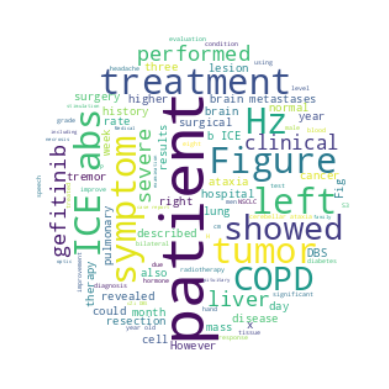

In [ ]:
# Display one wordcloud for each of the most frequent classes
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# plot a word cloud
text = str(df['case_text'])
wc = WordCloud(background_color="white", repeat=True, mask=mask, stopwords = STOPWORDS)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

### Nuage de mots médicaux

In [46]:
import spacy
import scispacy
from scispacy.linking import EntityLinker
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the Med7 model
nlp = spacy.load("en_core_sci_sm")

# Ajouter un linker vers UMLS (si tu veux mapper les entités à des concepts médicaux précis)
linker = EntityLinker(resolve_abbreviations=True, name="umls")
nlp.add_pipe("scispacy_linker", config={"resolve_abbreviations": True, "linker_name": "umls"})

ModuleNotFoundError: No module named 'spacy'

In [ ]:
# Échantillon aléatoire de 250 lignes (modifiable)
sample_df = df.sample(n=250, random_state=42)
text = " ".join(sample_df['case_text'].astype(str))

# Applique le modèle NLP sur tout le texte d’un coup (plus rapide et propre)
doc = nlp(text)

# Récupère les entités détectées
medical_terms = [ent.lemma_.lower() for ent in doc.ents]

# Ajoute des mots personnalisés si besoin
additional_terms = ["one", "two", "three", "day", "daily", "month"]
medical_terms.extend(additional_terms)

NameError: name 'df' is not defined

In [ ]:
from collections import Counter

# Compte les occurrences des termes médicaux
term_counts = Counter(medical_terms)

# Affiche les 20 termes les plus fréquents
most_common_terms = term_counts.most_common(40)

# Affichage propre
print("Top 20 des termes médicaux les plus fréquents :")
for term, count in most_common_terms:
    print(f"{term}: {count}")

Top 20 des termes médicaux les plus fréquents :
patient: 936
day: 370
month: 287
increase: 200
treatment: 197
week: 190
year: 186
level: 180
negative: 179
diagnosis: 154
figure: 147
diagnose: 132
admission: 125
lesion: 125
patient's: 122
finding: 117
case: 115
positive: 114
hospital: 103
decrease: 102
age: 100
symptom: 99
woman: 87
follow-up: 87
result: 86
severe: 84
fever: 82
mass: 79
bilateral: 78
physical examination: 78
detect: 74
presence: 71
tumor: 71
discharge: 69
history: 69
mri: 69
elevated: 69
associate with: 69
treat with: 67
examination: 67


['male', 'admit', 'department of surgery', 'clinical emergency hospital', 'bucharest', 'height', 'meter', 'multiple trauma', 'haemoperitoneum', 'splenic rupture', 'blunt bladder injury', 'microscopic', 'hematuria', 'mild cerebral contusion', 'retrograde', 'amnesia', 'facial abrasion', 'blunt ch trauma', 'blunt right knee injury', 'medical history', 'hepatitis c virus infection', 'admission', 'gcs=15', 'retrograde', 'amnesia', 'bp=122/70 mmhg', 'hr=75/min', 'sinus rhythm', 'rr=14/min', 'abdoman', 'soft', 'no rebound', 'guarding', 'tender', 'left upper quadrant', 'epigastrium', 'abdominal ultrasound', 'perisplenic fluid', 'hypoechoic splenic area', 'contrast ct', 'splenic laceration', 'spleen', 'upper pole', 'capsule disruption', 'splenic pedicle', 'perihepatic', 'perisplenic', 'blood', 'pelvis', 'presence', 'grade iv splenic injury', 'aast-ois', 'moderate', 'haemoperitoneum', 'performance', 'splenic angiography', 'heterogeneous', 'contrast', 'splenic parenchyma', 'contrast extravasation

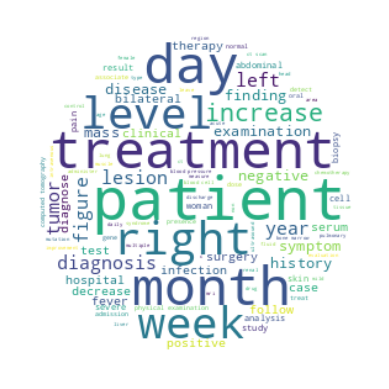

In [ ]:
# Génère le nuage de mots
medical_bagofwords = " ".join(medical_terms)
print(medical_terms)

wc = WordCloud(background_color="white", repeat=True, mask=mask, stopwords=STOPWORDS)
wc.generate(medical_bagofwords)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()